In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [ ]:
housing_dataset = pd.read_csv('/content/Housing.csv')

In [ ]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
housing_dataset.shape

(545, 13)

In [ ]:
housing_dataset.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]>

In [ ]:
duplicates = housing_dataset[housing_dataset.duplicated()]
print(f'Number of duplicate rows: {len(duplicates)}')

Number of duplicate rows: 0


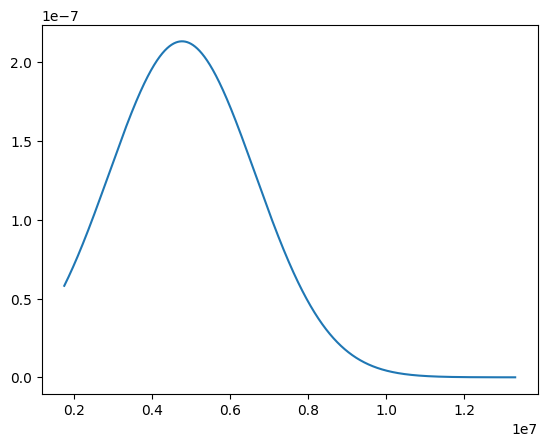

In [ ]:

from scipy.stats import norm
price = np.arange(housing_dataset['price'].min(),housing_dataset['price'].max(),0.1)
plt.plot(price,norm.pdf(price,housing_dataset['price'].mean(),housing_dataset['price'].std()))
plt.show()


In [ ]:
numeric_features = housing_dataset.select_dtypes(include=[np.number])
df_categoric = housing_dataset.select_dtypes(include=['object'])


In [ ]:
numeric_features = housing_dataset.select_dtypes(include=[np.number])
Q1 = numeric_features.quantile(0.25)
Q3 = numeric_features.quantile(0.75)
IQR = Q3 - Q1
numeric_features_cleaned = numeric_features[~((numeric_features < (Q1 - 1.5 * IQR)) | (numeric_features > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_categoric = housing_dataset.select_dtypes(include=['object'])

# Apply Label Encoding to 'furnishingstatus'
le = LabelEncoder()
df_categoric['furnishingstatus'] = le.fit_transform(df_categoric['furnishingstatus'])


In [ ]:
df_categoric_remaining = df_categoric.drop(columns=['furnishingstatus'])
df_categoric_encoded_remaining = pd.get_dummies(df_categoric_remaining, drop_first=True)

In [ ]:
df_categoric_encoded = pd.concat([df_categoric[['furnishingstatus']], df_categoric_encoded_remaining], axis=1)

# Ensure the indices match
df_categoric_encoded = df_categoric_encoded.loc[numeric_features.index]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# Combine scaled numeric features with encoded categorical features
X_combined = np.hstack((X_scaled, df_categoric_encoded.values))

In [ ]:
print(X_combined)

[[4.566365125868969 1.0467262882352133 1.4034193573588298 ... False True
  True]
 [4.004484046345774 1.7570095257333957 1.4034193573588298 ... False True
  False]
 [4.004484046345774 2.218232407225722 0.047278311684073836 ... False
  False True]
 ...
 [-1.6143267488861697 -0.7059206614356268 -1.308862733990682 ... False
  False False]
 [-1.6143267488861697 -1.0333889072951785 0.047278311684073836 ... False
  False False]
 [-1.6143267488861697 -0.5998393986923918 0.047278311684073836 ... False
  False False]]


In [ ]:
y = housing_dataset['price']

# Ensure the target variable matches the cleaned numeric features index
y = y[numeric_features.index]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.7, random_state=1)

# Initialize and train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

training_data_prediction = linear_regressor.predict(X_train)

score1 = metrics.r2_score(y_train, training_data_prediction)
score2 = metrics.mean_absolute_error(y_train, training_data_prediction)
score3 = metrics.mean_squared_error(y_train, training_data_prediction)
print('R squared value = ', score1)
print('Mean Absolute Error = ', score2)
print('Mean Squared Error = ', score3)


R squared value =  1.0
Mean Absolute Error =  8.970407620529456e-10
Mean Squared Error =  1.492607162611946e-18


In [ ]:
test_data_prediction = linear_regressor.predict(X_test)

In [ ]:
score1 = metrics.r2_score(y_test, test_data_prediction)
score2 = metrics.mean_absolute_error(y_test, test_data_prediction)
score3 = metrics.mean_squared_error(y_test, test_data_prediction)
print('R squared value = ', score1)
print('Mean Absolute Error = ', score2)
print('Mean Squared Error = ', score3)


R squared value =  1.0
Mean Absolute Error =  9.861779618637723e-10
Mean Squared Error =  1.7807027304120563e-18


Text(0.5, 1.0, 'Actual vs Predicted Prices')

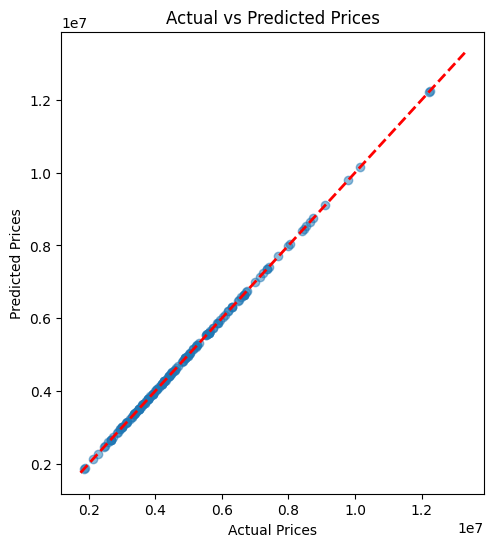

In [ ]:
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_train, training_data_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')



In [ ]:
# Initialize and train the XGBoost Regressor model
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate performance metrics for XGBoost
r_squared_xgb = metrics.r2_score(y_test, y_pred_xgb)
mean_squared_error_xgb = metrics.mean_squared_error(y_test, y_pred_xgb)

# Print the metrics for XGBoost
print(f'XGBoost R-squared: {r_squared_xgb:.4f}')
print(f'XGBoost Mean Squared Error: {mean_squared_error_xgb:.4f}')

In [ ]:
y_pred_xgb = xgb_regressor.predict(X_test)

# Create the True vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values for XGBoost')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Sample data
sample_data = {
    'price': [13300000],
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'mainroad': ['yes'],
    'guestroom': ['no'],
    'basement': ['no'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
}

sample_df = pd.DataFrame(sample_data)

# Preprocess sample data
# Apply Label Encoding
le = LabelEncoder()
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    sample_df[feature] = le.fit_transform(sample_df[feature])

# Encode categorical features
df_categoric_encoded = pd.get_dummies(sample_df[categorical_features], drop_first=True)
df_numeric = sample_df.drop(columns=categorical_features)
X_scaled = StandardScaler().fit_transform(df_numeric)

# Combine scaled numeric features with encoded categorical features
X_sample_combined = np.hstack((X_scaled, df_categoric_encoded.values))

# Initialize and train the models (ensure these models are trained on your full dataset)
linear_regressor = LinearRegression()
xgb_regressor = XGBRegressor()

# Example training - replace with your actual training code
linear_regressor.fit(X_train, y_train)
xgb_regressor.fit(X_train, y_train)

# Predict using the trained models
linear_regression_prediction = linear_regressor.predict(X_sample_combined)
xgb_prediction = xgb_regressor.predict(X_sample_combined)

print(f'Linear Regression Prediction: {linear_regression_prediction[0]}')
print(f'XGBoost Prediction: {xgb_prediction[0]}')


Linear Regression Prediction: 4373745.140388769
XGBoost Prediction: 4339991.5
